In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading and exploration

In [2]:
# Load the dataset
data = pd.read_csv('DS - challengeData.1634399212.csv')

In [3]:
# Get some basic information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   userId               1051 non-null   int64  
 1   regTime              1051 non-null   int64  
 2   testVariant          1051 non-null   int64  
 3   primaryAccount       1051 non-null   bool   
 4   regPage              1051 non-null   object 
 5   device               1051 non-null   object 
 6   app                  1051 non-null   bool   
 7   browser              1051 non-null   object 
 8   browserVersion       409 non-null    float64
 9   screenHeight         1051 non-null   int64  
 10  screenWidth          1051 non-null   int64  
 11  authMethod           1051 non-null   object 
 12  locationStep         1051 non-null   object 
 13  addedCity            1051 non-null   int64  
 14  locationCountry      442 non-null    object 
 15  addedGuestCount      1051 non-null   b

In [4]:
# Check for duplicate rows
data.duplicated().sum()

0

In [5]:
# Check for missing values
No_of_null = data.isna().sum().sort_values(ascending = False)
Percentage = data.isna().sum().sort_values(ascending = False)/data.shape[0]
Missing = pd.concat([No_of_null, Percentage], axis=1, keys=['Number', 'Percentage'])
Missing.head(5)

,Number,Percentage
browserVersion,642,0.610847
locationCountry,609,0.579448
userId,0,0.000000
addedCity,0,0.000000
venViews,0,0.000000


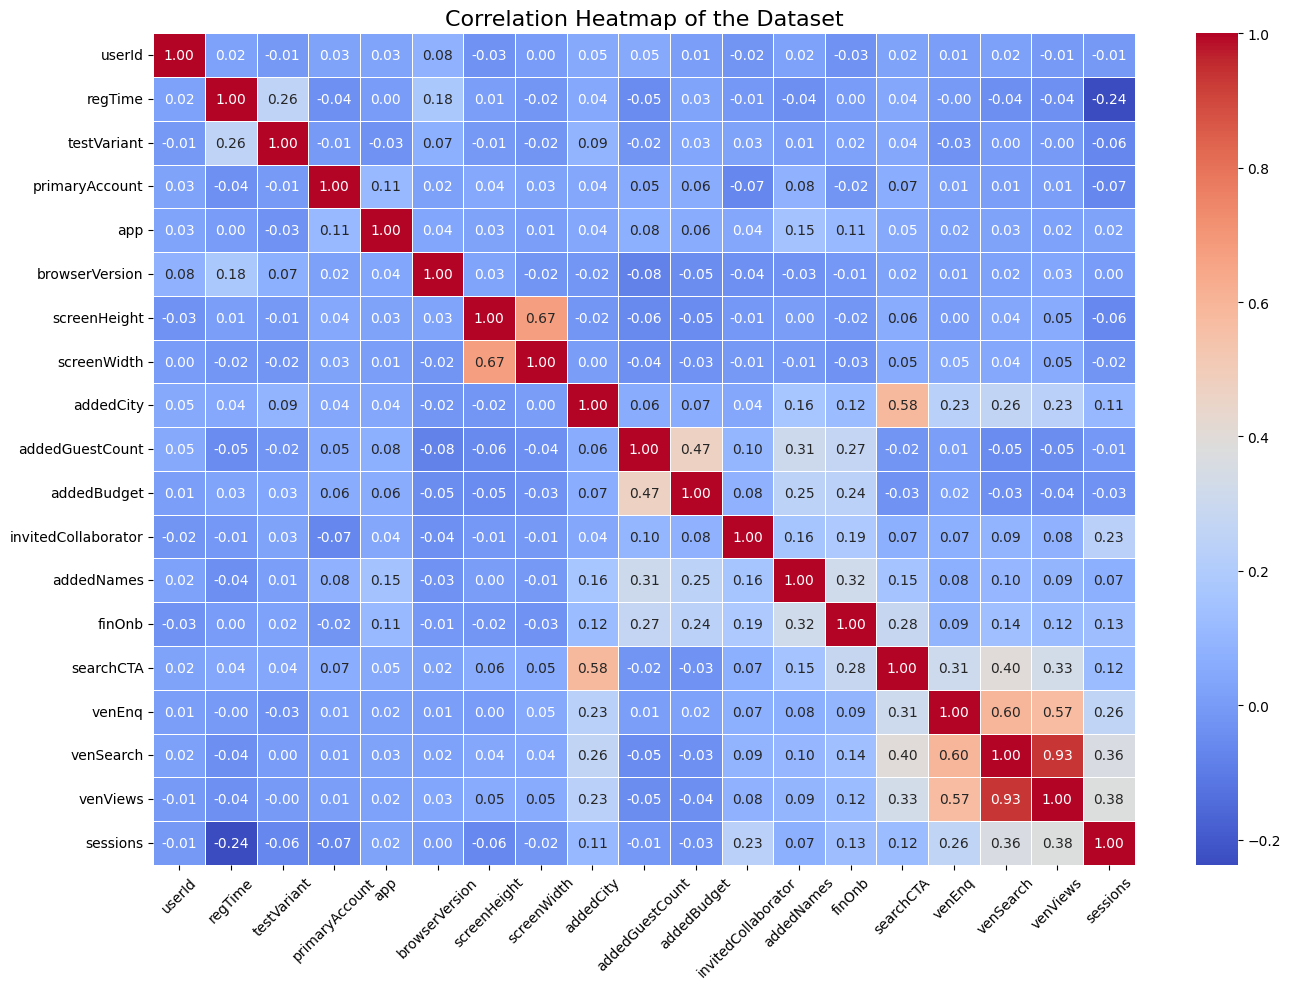

In [6]:
# Convert True&False columns to binary values
columns_to_convert = ['addedGuestCount', 'addedBudget', 'invitedCollaborator', 'addedNames']

for col in columns_to_convert:
    data[col] = data[col].astype(int)

# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")

# Adjust layout
plt.title('Correlation Heatmap of the Dataset', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Data Relationships Summary

- **searchCTA**:
  - A strong positive correlation with `addedCity` (0.58).
  - A moderate positive correlation with `venSearch` (0.40), `venViews` (0.33), and `venEnq` (0.31).

- **venEnq**:
  - A Strong positive correlation with both `venSearch` (0.60) and `venViews` (0.57).
  - A moderate positive correlation with`searchCTA` (0.31).
  
- **venSearch**:
  - A very strong positive correlation with `venViews` (0.93).
  - A strong positive correlation with `venEnq` (0.60).
  - A moderate positive correlation with`searchCTA` (0.40).
  
- **venViews**:
  - A very strong positive correlation with `venSearch` (0.93).
  - A strong positive correlation with `venEnq` (0.57).
  - A moderate positive correlation with `searchCTA` (0.33).

# Further data exploration

In [16]:
# Metrics to focus on
selected_metrics = ['addedCity', 'searchCTA', 'venEnq', 'venSearch', 'venViews']

# Descriptive Statistics for the key metrics for variants v0, v1, and v2
desc_stats_v0 = data[data['testVariant'] == 0][selected_metrics].describe()
desc_stats_v1 = data[data['testVariant'] == 1][selected_metrics].describe()
desc_stats_v2 = data[data['testVariant'] == 2][selected_metrics].describe()

desc_stats_v0, desc_stats_v1, desc_stats_v2

(        addedCity   searchCTA      venEnq   venSearch    venViews
 count  587.000000  587.000000  587.000000  587.000000  587.000000
 mean     0.335605    0.453152    0.921635    5.287905    5.318569
 std      0.472604    0.498225    2.837582   10.654386   12.518752
 min      0.000000    0.000000    0.000000    0.000000    0.000000
 25%      0.000000    0.000000    0.000000    0.000000    0.000000
 50%      0.000000    0.000000    0.000000    1.000000    0.000000
 75%      1.000000    1.000000    0.000000    6.000000    5.000000
 max      1.000000    1.000000   26.000000   85.000000  130.000000,
         addedCity   searchCTA      venEnq   venSearch    venViews
 count  297.000000  297.000000  297.000000  297.000000  297.000000
 mean     0.461279    0.461279    0.875421    4.198653    4.114478
 std      0.499340    0.499340    2.493499    8.267749    9.413925
 min      0.000000    0.000000    0.000000    0.000000    0.000000
 25%      0.000000    0.000000    0.000000    0.000000    0.0

In [24]:
# Compute descriptive statistics for the key metrics for test variants v0, v1, and v2
desc_stats_v0 = data[data['testVariant'] == 0][selected_metrics].describe()
desc_stats_v1 = data[data['testVariant'] == 1][selected_metrics].describe()
desc_stats_v2 = data[data['testVariant'] == 2][selected_metrics].describe()

# Concatenate the mean and standard deviation for the three variants
mean_std_table_final = pd.concat([
    desc_stats_v0.loc[['count','mean', 'std']],
    desc_stats_v1.loc[['count','mean', 'std']],
    desc_stats_v2.loc[['count','mean', 'std']]
], axis=1, keys=['Variant v0', 'Variant v1', 'Variant v2'])

# Rearrange the table
ordered_columns = [(f'Variant v{i}', metric) for metric in selected_metrics for i in range(3)]
mean_std_table_ordered = mean_std_table_final[ordered_columns]
mean_std_table_ordered

,Variant v0,Variant v1,Variant v2,Variant v0,Variant v1,Variant v2,Variant v0,Variant v1,Variant v2,Variant v0,Variant v1,Variant v2,Variant v0,Variant v1,Variant v2
,addedCity,addedCity,addedCity,searchCTA,searchCTA,searchCTA,venEnq,venEnq,venEnq,venSearch,venSearch,venSearch,venViews,venViews,venViews
count,587.000000,297.000000,167.000000,587.000000,297.000000,167.000000,587.000000,297.000000,167.000000,587.000000,297.000000,167.000000,587.000000,297.000000,167.000000
mean,0.335605,0.461279,0.419162,0.453152,0.461279,0.520958,0.921635,0.875421,0.688623,5.287905,4.198653,5.916168,5.318569,4.114478,5.766467
std,0.472604,0.499340,0.494906,0.498225,0.499340,0.501063,2.837582,2.493499,2.014718,10.654386,8.267749,10.531315,12.518752,9.413925,11.577890


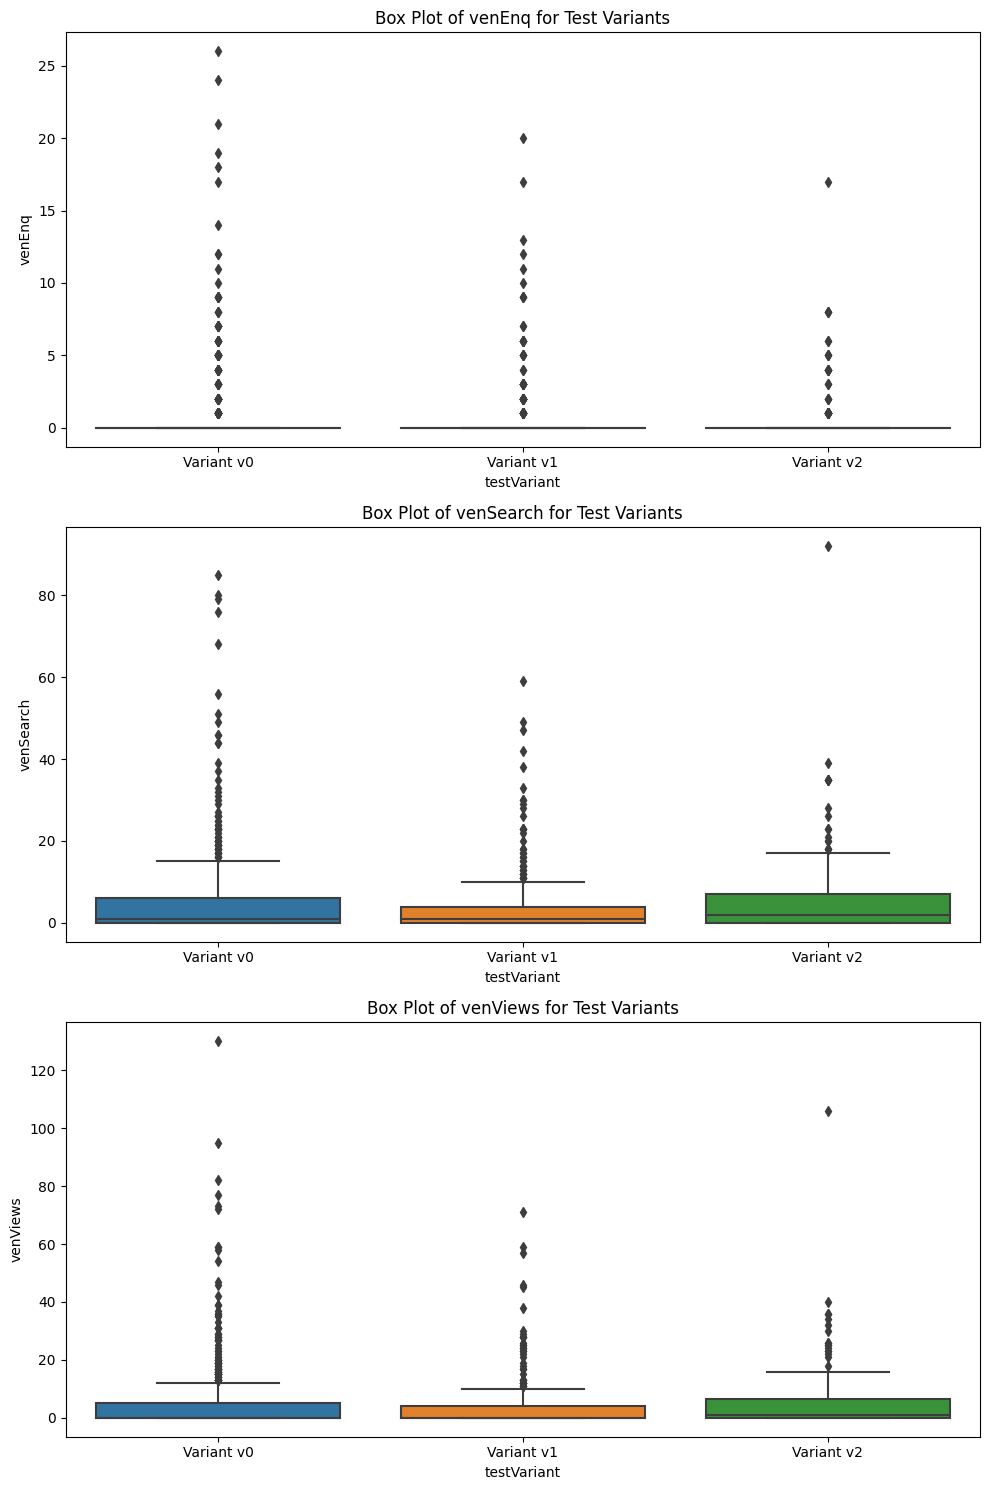

In [22]:
# Box Plots for each key metric for variants v0, v1, and v2
num_metric = ['venEnq', 'venSearch', 'venViews']

fig, axes = plt.subplots(nrows=len(num_metric), ncols=1, figsize=(10, 15))

for i, metric in enumerate(num_metric):
    sns.boxplot(x='testVariant', y=metric, data=data, ax=axes[i])
    axes[i].set_title(f'Box Plot of {metric} for Test Variants')
    axes[i].set_xticklabels(['Variant v0', 'Variant v1', 'Variant v2'])

plt.tight_layout()
plt.show()

# A/B Testing: Variant 0 vs Variant 1

## Objective:
Increase the proportion of registered users who search for venues and, ultimately, send them enquiries.

## Variants:
- **Variant 0 (Control):** Original design without any changes.
- **Variant 1 (Treatment):** Hid the option of choosing “Undecided” on the location step of onboarding, leaving only data entry or SKIP as options.

## Data Filtering:
To focus on the relevant user base, we filtered the data to include only users who saw the location step during onboarding. However, this filter had no impact on our dataset since all users from Variant 0 and Variant 1 saw the location step.

## Dataset Overview:
- **Total number of users:** 884
- **Users in Variant 0:** 587
- **Users in Variant 1:** 297

## Metrics Tested:
1. `addedCity`
2. `searchCTA`
3. `venEnq`
4. `venSearch`
5. `venViews`

## Hypotheses:

For each metric tested, the hypotheses are structured as follows:

- **Null Hypothesis (H_0)**: The change made in Variant 1 does not have a statistically significant effect on the metric compared to the control group (Variant 0).
  
- **Alternative Hypothesis (H_1)**: The change made in Variant 1 has a statistically significant effect on the metric compared to the control group (Variant 0).

## Statistical Tests:
For binary metrics (`addedCity` and `searchCTA`), Z-test is used.

For continuous metrics (`venEnq`, `venSearch`, and `venViews`), T-test is used.


In [7]:
# Filter for the v0 vs v1 A/B test
v0_v1_filter = (data['testVariant'].isin([0, 1])) & (data['locationStep'] != 'notseen')

In [8]:
# Dataset Overview
total_count = data[v0_v1_filter].shape[0]
v0_count = data[v0_v1_filter][data[v0_v1_filter]['testVariant'] == 0].shape[0]
v1_count = data[v0_v1_filter][data[v0_v1_filter]['testVariant'] == 1].shape[0]

total_count, v0_count, v1_count

(884, 587, 297)

In [9]:
def z_test(data, control_group, treatment_group, metric):
    """Function to perform a Z-test on two groups for a given metric and return results in percentage format."""
    
    # Split data
    control_data = data[data['testVariant'] == control_group]
    treatment_data = data[data['testVariant'] == treatment_group]
    
    # Calculate proportions
    prop1 = control_data[metric].mean() * 100
    prop2 = treatment_data[metric].mean() * 100
    
    # Calculate difference in proportions
    prop_diff = prop2 - prop1
    
    # Calculate pooled proportion
    prop_combined = (control_data[metric].sum() + treatment_data[metric].sum()) / (len(control_data) + len(treatment_data))
    
    # Calculate Z-statistic
    z_stat = (prop_diff / 100) / np.sqrt(prop_combined * (1 - prop_combined) * (1/len(control_data) + 1/len(treatment_data)))
    
    # Calculate P-value
    p_value = 1 - norm.cdf(abs(z_stat))
    
    return {
        "Percentage (Control)": prop1, 
        "Percentage (Treatment)": prop2, 
        "Percentage Difference": prop_diff, 
        "Z-Statistic": z_stat, 
        "P-Value": p_value
    }

def t_test(data, control_group, treatment_group, metric):
    """Function to perform a T-test on two groups for a given metric."""
    
    # Split data
    control_data = data[data['testVariant'] == control_group]
    treatment_data = data[data['testVariant'] == treatment_group]
    
    # Calculate means
    mean1 = control_data[metric].mean()
    mean2 = treatment_data[metric].mean()
    
    # Calculate difference in means
    mean_diff = mean2 - mean1
    
    # Conduct T-test
    t_stat, p_value = ttest_ind(control_data[metric], treatment_data[metric])
    
    return {
        "Mean (Control)": mean1, 
        "Mean (Treatment)": mean2, 
        "Mean Difference": mean_diff, 
        "T-Statistic": t_stat, 
        "P-Value": p_value
    }

In [10]:
# Metrics for Z-test
z_metrics = ['addedCity', 'searchCTA']

# Run the Z-test for v0 vs v1
v0_v1_z_test_results = {metric: z_test(data, 0, 1, metric) for metric in z_metrics}
pd.DataFrame(v0_v1_z_test_results)


,addedCity,searchCTA
Percentage (Control),33.560477,45.315162
Percentage (Treatment),46.127946,46.127946
Percentage Difference,12.567469,0.812784
Z-Statistic,3.640128,0.229178
P-Value,0.000136,0.409365


In [11]:
# Metrics for T-test
t_metrics = ['venEnq', 'venSearch', 'venViews']

# Run the T-test for v0 vs v1
v0_v1_t_test_results = {metric: t_test(data[v0_v1_filter], 0, 1, metric) for metric in t_metrics}
pd.DataFrame(v0_v1_t_test_results)

,venEnq,venSearch,venViews
Mean (Control),0.921635,5.287905,5.318569
Mean (Treatment),0.875421,4.198653,4.114478
Mean Difference,-0.046215,-1.089251,-1.204091
T-Statistic,0.237998,1.542374,1.461490
P-Value,0.811938,0.123341,0.144237


# Insights for A/B Testing: Variant 0 vs Variant 1:

- The `addedCity` metric showed a notable statistically significant difference: Variant 1 had a 12.57% increase compared to Variant 0, indicating that changes in Variant 1 might motivate users to add a city.
  
- For metrics like `searchCTA`, `venEnq`, `venSearch`, and `venViews`, no statistically significant differences were observed between the variants (p-value > 0.05). This implies that changes in Variant 1 might not enhance these metrics compared to Variant 0.


# A/B Testing: Variant 0 vs Variant 2

## Objective:
Increase the proportion of registered users who search for venues and, ultimately, send them enquiries.

## Variants:
- **Variant 0 (Control):** Original design without any changes.
- **Variant 2 (Treatment):** Hid the text around the counts of venues in your location on the CTA, leaving only “We found some perfect venues for you!”.

## Data Filtering:
Given the nature of the treatment in Variant 2, it would be more relevant to filter data based on whether users completed onboarding (`finOnb` = 1). This ensures that we are analyzing only those users who were exposed to the final CTA screen.

## Dataset Overview:
- **Total number of users:** 692
- **Users in Variant 0:** 536
- **Users in Variant 2:** 156

## Metrics Tested:
1. `addedCity`
2. `searchCTA`
3. `venEnq`
4. `venSearch`
5. `venViews`

## Hypotheses:
For each metric tested, the hypotheses are structured as follows:

- **Null Hypothesis (H_0)**: The change made in Variant 2 does not have a statistically significant effect on the metric compared to the control group (Variant 0).
  
- **Alternative Hypothesis (H_1)**: The change made in Variant 2 has a statistically significant effect on the metric compared to the control group (Variant 0).

## Statistical Tests:
For binary metrics (`addedCity` and `searchCTA`), Z-test is used.

For continuous metrics (`venEnq`, `venSearch`, and `venViews`), T-test is used.


In [12]:
# Filter for the v0 vs v2 A/B test
v0_v2_filter = (data['testVariant'].isin([0, 2])) & (data['finOnb'] == 1)

In [13]:
# Dataset Overview
total_count = data[v0_v2_filter].shape[0]
v0_count = data[v0_v2_filter][data[v0_v2_filter]['testVariant'] == 0].shape[0]
v2_count = data[v0_v2_filter][data[v0_v2_filter]['testVariant'] == 2].shape[0]

total_count, v0_count, v2_count

(692, 536, 156)

In [14]:
# Metrics for Z-test
z_metrics = ['addedCity', 'searchCTA']

# Run the Z-test for v0 vs v1
v0_v2_z_test_results = {metric: z_test(data[v0_v2_filter], 0, 2, metric) for metric in z_metrics}
pd.DataFrame(v0_v2_z_test_results)


,addedCity,searchCTA
Percentage (Control),34.701493,49.626866
Percentage (Treatment),44.230769,55.769231
Percentage Difference,9.529277,6.142365
Z-Statistic,2.171435,1.350660
P-Value,0.014949,0.088402


In [15]:
# Metrics for T-test
t_metrics = ['venEnq', 'venSearch', 'venViews']

# Run the T-test for v0 vs v1
v0_v2_t_test_results = {metric: t_test(data[v0_v2_filter], 0, 2, metric) for metric in t_metrics}
pd.DataFrame(v0_v2_t_test_results)

,venEnq,venSearch,venViews
Mean (Control),1.005597,5.779851,5.807836
Mean (Treatment),0.711538,6.134615,6.000000
Mean Difference,-0.294059,0.354765,0.192164
T-Statistic,1.163127,-0.356458,-0.165882
P-Value,0.245180,0.721607,0.868299


# Insights for A/B Testing: Variant 0 vs Variant 2:

- **addedCity Metric**: The `addedCity` metric demonstrated a noteworthy statistically significant difference. Variant 2 exhibited a 9.53% increase compared to Variant 0. This suggests that the modifications in Variant 2 could be encouraging more users to add a city.

- **searchCTA Metric**: Variant 2 showed a 6.14% increase in the `searchCTA` metric compared to Variant 0. Although this difference wasn't statistically significant with a p-value of 0.0884, the p-value is close to the significance threshold of 0.05. This indicates that with a larger dataset, we might observe a statistically significant difference.

- **Other Metrics (venEnq, venSearch, venViews)**: For metrics `venEnq`, `venSearch`, and `venViews`, no statistically significant differences were observed between the two variants. This indicates that the changes in Variant 2 may not have a meaningful impact on these specific metrics in comparison to Variant 0.
